<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & Classification

_Authors: Evonne_

# Data Cleaning and EDA

## Import Libraries

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
import seaborn as sns

sns.set(style="whitegrid")

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read in and display Dataset

In [2]:
df_a= pd.read_csv('./datasets/df_a.csv')
df_b= pd.read_csv('./datasets/df_b.csv')

In [3]:
df_a.head()

,id,title,comment,date_created,score,subreddit
0,hdge6q,Hey All! I made a documentary about Joe Biden....,NaN,1.592780e+09,29,democrats
1,hff6bt,It’s Time for a Blue Wave to Restore America.,NaN,1.593055e+09,629,democrats
2,hf7pni,"In Scathing Letter, More Than 80-Percent of Fa...",NaN,1.593027e+09,1336,democrats
3,hfgpv1,Mark Cuban endorses Biden on Hannity: He 'actu...,NaN,1.593064e+09,70,democrats
4,hf6wes,Judiciary Democrat calls for House to pursue i...,NaN,1.593025e+09,201,democrats


In [4]:
df_b.head()

,id,title,comment,date_created,score,subreddit
0,hf616r,Just putting this out there.,NaN,1.593022e+09,2381,Republican
1,hflqaf,New evidence shows it is time to charge Joe Bi...,NaN,1.593090e+09,15,Republican
2,hf68bl,Vroom vroom,NaN,1.593023e+09,223,Republican
3,hezlce,Pelosi says Republicans 'trying to get away wi...,NaN,1.592999e+09,659,Republican
4,hfkbyi,"Al Gore, UN Secretary-General, others now dema...",NaN,1.593084e+09,4,Republican


Making sure we don't have any duplicate comment (assuming the subreddit does not have that many posts, where it will loop back to the first page)

In [5]:
# Remove any Duplicate Rows
print("Original Number of posts in df_a: ", len(df_a))
print("Original Number of post in df_b: ", len(df_b))
print('')

df_a.drop_duplicates(subset = 'title', inplace = True)
df_b.drop_duplicates(subset = 'title', inplace = True)

print("Number of posts in df_a w/o duplicates: ", len(df_a))
print("Number of posts in df_b w/o duplicates: ", len(df_b))

Original Number of posts in df_a:  990
Original Number of post in df_b:  988

Number of posts in df_a w/o duplicates:  979
Number of posts in df_b w/o duplicates:  805


There is a higher number of duplicates in df_b which suggests that r/Republican is less active. 

In [6]:
# Concatenate into a single DataFrame
df = pd.concat([df_a, df_b])
df.shape

(1784, 6)

In [7]:
# Check for null in columns
df.isnull().sum()

id                 0
title              0
comment         1624
date_created       0
score              0
subreddit          0
dtype: int64

Most of the reddit posts does not have any comment within the title itself. Hence we will impute those with 'None' value

In [8]:
# Imputate Null values 
df['comment'] = df['comment'].fillna('None')
df.isnull().sum()

id              0
title           0
comment         0
date_created    0
score           0
subreddit       0
dtype: int64

In [9]:
# Convert Nominal variables
for group in ['subreddit']:
    df[group] = df[group].map({'democrats': 1, 'Republican': 0})

df.head()

,id,title,comment,date_created,score,subreddit
0,hdge6q,Hey All! I made a documentary about Joe Biden....,None,1.592780e+09,29,1
1,hff6bt,It’s Time for a Blue Wave to Restore America.,None,1.593055e+09,629,1
2,hf7pni,"In Scathing Letter, More Than 80-Percent of Fa...",None,1.593027e+09,1336,1
3,hfgpv1,Mark Cuban endorses Biden on Hannity: He 'actu...,None,1.593064e+09,70,1
4,hf6wes,Judiciary Democrat calls for House to pursue i...,None,1.593025e+09,201,1


In [10]:
# Convert Unix Time to human readable datetime
df['date_created'] = df['date_created'].astype(int)
df['date_created'] = (pd.to_datetime(df['date_created'], unit = 's'))
df.head()

,id,title,comment,date_created,score,subreddit
0,hdge6q,Hey All! I made a documentary about Joe Biden....,None,2020-06-21 22:55:13,29,1
1,hff6bt,It’s Time for a Blue Wave to Restore America.,None,2020-06-25 03:24:22,629,1
2,hf7pni,"In Scathing Letter, More Than 80-Percent of Fa...",None,2020-06-24 19:33:43,1336,1
3,hfgpv1,Mark Cuban endorses Biden on Hannity: He 'actu...,None,2020-06-25 05:54:06,70,1
4,hf6wes,Judiciary Democrat calls for House to pursue i...,None,2020-06-24 18:52:00,201,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1784 entries, 0 to 812
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1784 non-null   object        
 1   title         1784 non-null   object        
 2   comment       1784 non-null   object        
 3   date_created  1784 non-null   datetime64[ns]
 4   score         1784 non-null   int64         
 5   subreddit     1784 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 97.6+ KB


In [12]:
df.groupby('subreddit').describe()

score                                                      
           count        mean         std  min  25%   50%   75%     max
subreddit                                                             
0          805.0   98.563975  281.409976  0.0  5.0  13.0  48.0  2381.0
1          979.0  113.010215  333.953687  0.0  7.0  16.0  54.5  2890.0

### Boxplot

In [13]:
df['title_len']=df['title'].apply(len)

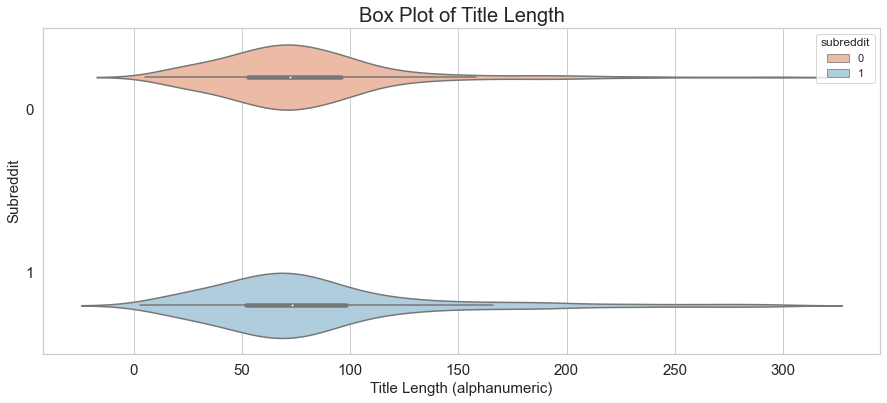

In [14]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.violinplot(y= 'subreddit', 
                    x='title_len',
                    data=df, 
                    orient='h', 
                    hue='subreddit',
                    palette='RdBu')

ax.set_title('Box Plot of Title Length',fontsize=20)
ax.set_xlabel("Title Length (alphanumeric)",fontsize=15)
ax.set_ylabel("Subreddit",fontsize=15)
ax.tick_params(labelsize=15)

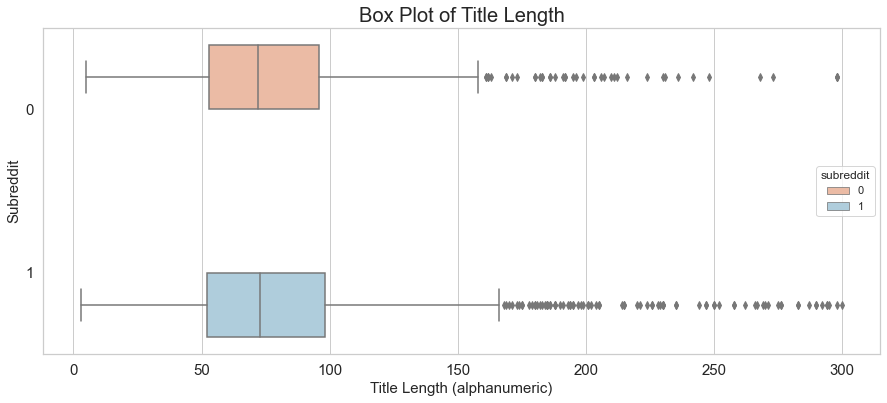

In [15]:
#normal boxplot
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(y= 'subreddit', 
                    x='title_len',
                    data=df, 
                    orient='h', 
                    hue='subreddit',
                    palette='RdBu')

ax.set_title('Box Plot of Title Length',fontsize=20)
ax.set_xlabel("Title Length (alphanumeric)",fontsize=15)
ax.set_ylabel("Subreddit",fontsize=15)
ax.tick_params(labelsize=15)

The distribution of the post length were both right-skewed. This violin boxplot suggest that majority of the reddit post of both subreddits were mostly on an average of 60 words. 
Title length for both subreddit are generally the same though Democrats post has silghtly wider spread. However, there seem to be a few extreme outlier for subreddit Republican

#### Save Cleaned DataFrame as csv file

In [16]:
df.to_csv('./datasets/df.csv', index = False)

As title feature is in natural language, checking for outlier and/or distribution is Not Applicable.
With this EDA, it has provided insufficient data and can barely answer the problem statement. As the following still needs to occur:

- Creating bag-of-words model in order convert text of the comments into numerical values